In [0]:
#loading necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten, MaxPooling2D, Input, BatchNormalization

In [0]:
#loading data
train = '/content/chest_xray/train'
test = '/content/chest_xray/test'
val = '/content/chest_xray/val'

## Model

In [0]:
#vgg1 application 
base_model = VGG16(input_shape = (224,224,3), weights='imagenet', include_top=False)

#adding layer to neural net
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True, beta_initializer='zeros', gamma_initializer='ones', moving_mean_initializer='zeros', moving_variance_initializer='ones', beta_regularizer=None, gamma_regularizer=None, beta_constraint=None, gamma_constraint=None)
x = Flatten()(base_model.output)
prediction = Dense(2, activation='softmax')(x)

#model
model = Model(inputs=base_model.input, outputs=prediction)


#freeze all convolutional vgg16 layer
for layer in base_model.layers:
    layer.trainable = False


In [34]:
#summary of the model
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])


## ImageDataGenerator

In [0]:
#for train data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=.2,
                                   zoom_range=.2,
                                   horizontal_flip=True)

#for valid data
valid_datagen = ImageDataGenerator(rescale=1./255)

#for test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [37]:
#for train data
train_data_generator = train_datagen.flow_from_directory('/content/chest_xray/train',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

#for valid data
valid_data_generator = train_datagen.flow_from_directory('/content/chest_xray/val',
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

#for test data
test_data_generator = test_datagen.flow_from_directory('/content/chest_xray/test',
                                                      target_size=(224,224),
                                                      batch_size=32,
                                                      class_mode='categorical'
                                                      )

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


Here have very less amount of validation data. from this data finding good validation loss and validation curve is very tough. This is a kaggle competition problem, for this I have used test data as validation data

## Training 

In [38]:
#training the model
model_fit = model.fit_generator(generator=train_data_generator, 
              steps_per_epoch=len(train_data_generator),
              epochs=5,   
              validation_data=test_data_generator, 
              validation_steps=len(test_data_generator)
              )

Epoch 1/5
163/163 [==============================] - 134s 823ms/step - loss: 0.2128 - accuracy: 0.9132 - val_loss: 0.0645 - val_accuracy: 0.8670
Epoch 2/5
163/163 [==============================] - 131s 802ms/step - loss: 0.1121 - accuracy: 0.9582 - val_loss: 0.0430 - val_accuracy: 0.9119
Epoch 3/5
163/163 [==============================] - 130s 800ms/step - loss: 0.0894 - accuracy: 0.9647 - val_loss: 0.0367 - val_accuracy: 0.9295
Epoch 4/5
163/163 [==============================] - 130s 796ms/step - loss: 0.0988 - accuracy: 0.9670 - val_loss: 0.0166 - val_accuracy: 0.9006
Epoch 5/5
163/163 [==============================] - 131s 801ms/step - loss: 0.0998 - accuracy: 0.9609 - val_loss: 0.0020 - val_accuracy: 0.9087


# Accuracy and Loss curve

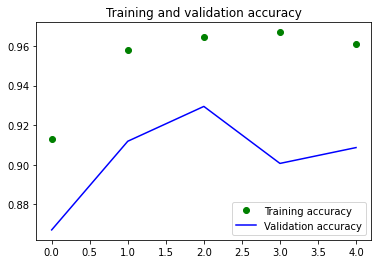

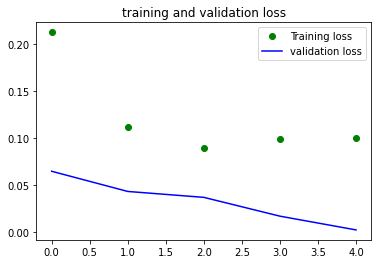

In [40]:
accuracy = model_fit.history['accuracy']
val_accuracy = model_fit.history['val_accuracy']

loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']

epochs = range(len(val_accuracy))
plt.plot(epochs, accuracy, 'go', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('training and validation loss')
plt.legend()
plt.show()



need parameter tuning to get more accurate model